In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns


# Toronto Shelter System Flow data from https://open.toronto.ca/dataset/toronto-shelter-system-flow/

In [3]:
df=pd.read_csv(r'C:\Users\USER\Documents\visualization\toronto-shelter-system-flow.csv')
df

,_id,date(mmm-yy),population_group,returned_from_housing,returned_to_shelter,newly_identified,moved_to_housing,became_inactive,actively_homeless,ageunder16,age16-24,age25-34,age35-44,age45-54,age55-64,age65over,gender_male,gender_female,"gender_transgender,non-binary_or_two_spirit",population_group_percentage
0,1,Jan-18,All Population,46,494,1106,508,862,7958,1233,1111,1341,1560,1318,973,422,4963,2912,83,100.0%
1,2,Jan-18,Chronic,11,29,317,111,111,2532,223,346,313,403,505,495,247,1632,870,30,31.8%
2,3,Jan-18,Refugees,4,32,651,328,75,2408,914,241,414,547,204,66,22,1219,1177,12,30.3%
3,4,Jan-18,Families,0,14,561,321,57,2277,1232,187,276,411,130,23,18,968,1308,1,28.6%
4,5,Jan-18,Youth,12,64,116,44,116,924,0,924,0,0,0,0,0,571,312,41,11.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,616,Oct-24,Families,3,7,159,106,72,2822,1400,283,337,519,210,51,22,1198,1621,3,27.3%
616,617,Oct-24,Youth,6,26,63,34,39,977,0,977,0,0,0,0,0,550,386,41,9.5%
617,618,Oct-24,Single Adult,21,163,212,137,260,6532,0,0,1933,1925,1267,951,454,4259,2200,73,63.2%
618,619,Oct-24,Non-refugees,18,164,154,93,247,4256,350,473,586,860,783,784,420,2654,1505,97,41.2%


# Monthly Trend 
For all population actively homeless and those that have moved to housing between January 2018 to October 2024. For the sake of making the x axis readable, I've set the ticks in increments of 17 months. 

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

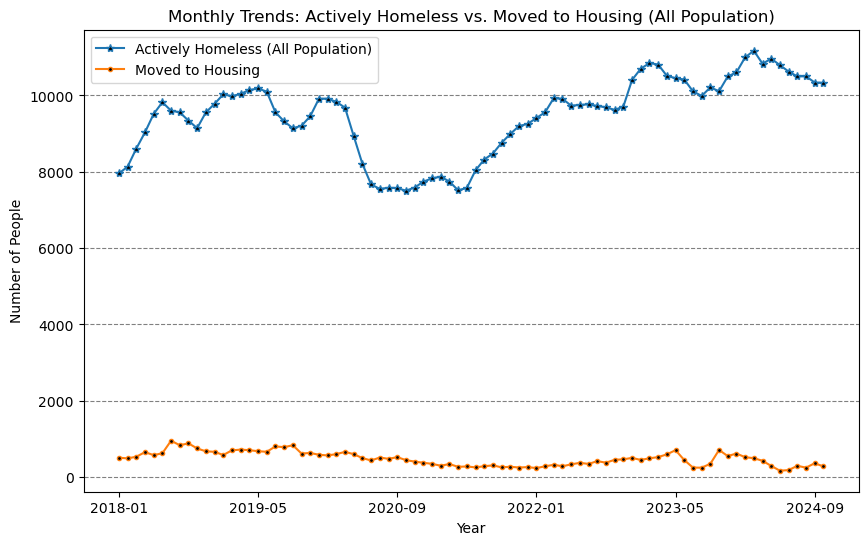

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date(mmm-yy)' is converted to datetime format
df['date'] = pd.to_datetime(df['date(mmm-yy)'], format='%b-%y')

# Filter data to include only 'All Population' for the actively_homeless column
df_all_pop = df[df['population_group'] == 'All Population']

# Aggregating the data by month (only for 'All Population')
monthly_trends = df_all_pop.groupby(df_all_pop['date'].dt.to_period('M')).agg({
    'actively_homeless': 'sum',
    'moved_to_housing': 'sum'
}).reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['date'].astype(str), monthly_trends['actively_homeless'], label='Actively Homeless (All Population)', marker='*', markerfacecolor = '#000000')
plt.plot(monthly_trends['date'].astype(str), monthly_trends['moved_to_housing'], label='Moved to Housing', marker='.', markerfacecolor = '#000000')

plt.title('Monthly Trends: Actively Homeless vs. Moved to Housing (All Population)')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.grid(axis='y', linestyle='--', color='gray')


# Extract the year from the 'date' column to display only the year on the x-axis
monthly_trends['year'] = monthly_trends['date'].dt.year

# Set x-ticks to display only the year
plt.xticks(ticks=range(0, len(monthly_trends), len(monthly_trends)//5), labels=monthly_trends['year'].unique(), rotation=45)

# Ensure everything fits well and is spaced nicely
plt.tight_layout()


plt.show()


# Note
The error in the code here occurs because the number of tick positions does not match the number of labels. But I had to keep it this way to not overcrowd the x-axis and still make it make sense. 